<a href="https://colab.research.google.com/github/ShinWalnut/ABR_basic/blob/master/ABR_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

ABR Basic class Homework #2
Linear Regression

In [0]:
# data
iteration = 801

x_train = 2 * np.random.rand(100, 1)
y_train = 8 - 2.5 * x_train + np.random.randn(100, 1)
x_test = np.linspace(0,2,500).reshape(-1,1)

X=tf.placeholder(dtype=tf.float32, shape=[None,1], name="x")
Y=tf.placeholder(dtype=tf.float32, shape=[None,1], name="y")
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
W = tf.Variable(tf.random_normal([1,1]), dtype=tf.float32)

In [0]:
#model
model = tf.matmul(X,W) +b
loss = tf.reduce_mean(tf.square(model - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train = optimizer.minimize(loss)
loss_hist=[]
feed = {X:x_train, Y:y_train}

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(iteration):
    sess.run(train, feed_dict=feed)
    loss_hist.append(sess.run(loss, feed_dict = feed))
  
  y_model_test = sess.run(model, feed_dict={X: x_test})

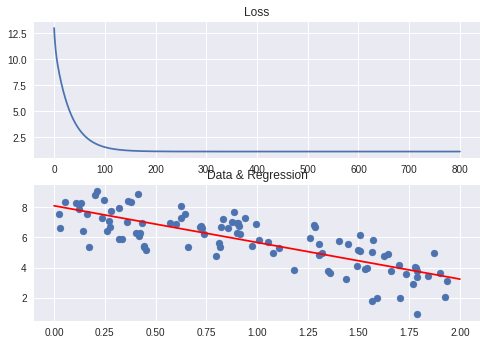

In [91]:
#plot
plt.subplot(211).plot(range(iteration),loss_hist)
plt.title("Loss")

plt.subplot(212).scatter(x_train, y_train)
plt.title("Data & Regression")
plt.plot(x_test, y_model_test,"r-")